<table style="width:100%; float:center; background-color:#FFFFFF" align="left">
<tr>
<td style="text-align:left; background-color:#FFFFFF"></td>
<td style="text-align:right; background-color:#FFFFFF"><div>
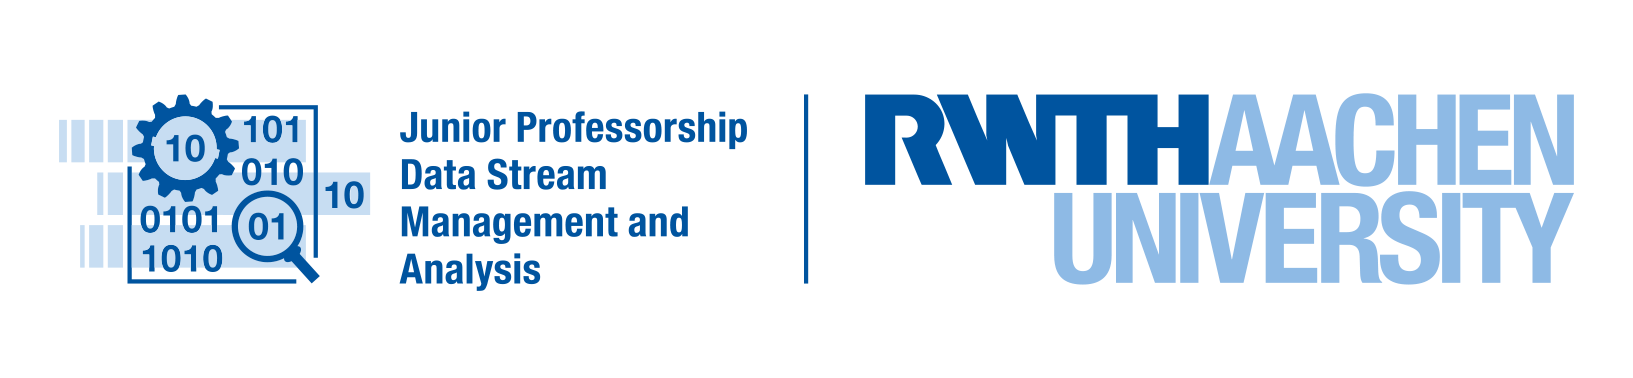
    
</div>
</td></tr>
</table>

Prof. Dr. Sandra Geisler <br>
Soo-Yon Kim, Liam Tirpitz

November 28, 2022

<center>

<h1> Implementation of Databases <br />(Winter Term 2022/2023)</h1>
    
<h1> Exercise 4</h1>
    
</center>

---
**Due until Monday, December 12 at 23:59.
Please submit your solutions as a Jupyter notebook to Moodle.
Please do _not_ submit handwritten solutions!  
Please submit your solutions in groups of three.**
Solutions to this exercise will be presented on Friday, December 16.

---

### Group members: [Til Mohr, 405959], [Simon Michau, 406133], [Marc Ludevid Wulf, 405401]  
#### Insert all group members by double-clicking on this cell.

---

## Exercise 4.1 (Cost-Based Optimization) (12 pts)



Given is a relational schema with two relations $R(A,B,C), S(C,D)$. The following information about the relations, selectivities, and indexes is given:
- $|R|=|S|=$2.000.000 tuples
- A page can hold 200 tuples of $R$, or 20 tuples of $S$.
- The following selectivities are given:  
$F(R.C=S.C)=10^{-10}$ (for each value in $R.C$, there is at most one matching tuple in $S.C$)  
$F(R.B=20)=10^{-3}$  
$F(S.D<60)=10^{-1}$  
- There are the following indexes:  
A clustered B+ tree index on $R.B$.  
An unclustered B+ tree index on $S.C$.  
An unclustered B+ tree index on $S.D$.  

The cost for navigating to a leaf node in a B+ tree index is 3 I/O operations. Consider in the following questions only the costs for reading the relations or writing intermediate results, but not the costs for writing the final result.

1\. Compute the number of required I/O operations and the size of the results in terms of tuples and pages for the following operations:
- $\sigma_{B=20}(R)$ using the clustered index on $R.B$.
- $\sigma_{B=20}(R)$ using a relational scan of $R$ (note: the relation is sorted according to $R.B$).
- $\sigma_{D<30}(S)$ using the unclustered index on $S.D$.

a.
 - Number of matching tuples: $\vert R \vert \cdot F(R.B = 20) = 2 \cdot 10^6 \cdot 10^{-3} = 2 \cdot 10^3$
 - Number of matching pages: $\frac{2 \cdot 10^3}{200} = 10$
 - Number of I/O operations: $10 + 3 = 13$ (3 to find the first leaf node, 10 to read the adjacent pages since tree is clustered)

b.
 - Number of matching tuples: $\vert R \vert \cdot F(R.B = 20) = 2 \cdot 10^6 \cdot 10^{-3} = 2 \cdot 10^3$
 - Number of matching pages: $\frac{2 \cdot 10^3}{200} = 10$
 - Number of total pages: $\frac{2 \cdot 10^6}{200} = 10^4$
 - Number of I/O operations: $0.15 \cdot 10^4 + 1.5 \cdot 10^4 = 1.65 \cdot 10^4$

c.
 - Number of matching tuples: $\vert S \vert \cdot F(S.D < 60) = 2 \cdot 10^6 \cdot 10^{-1} = 2 \cdot 10^5$
 - Number of matching pages: $\frac{2 \cdot 10^5}{20} = 10^4$
 - Number of I/O operations: $10^4 + 3 = 10003$

2\. Given is the following query:  
```sql
SELECT DISTINCT R.* FROM R,S  
WHERE R.C=S.C AND R.B=20 AND S.D<60
```
Suppose that you can only use an index nested loop join to evaluate the query, using the indexes described above. Taking into account the results for the previous subtask, what would be the optimal strategy to execute the query? Give the costs for this strategy.  

Optimal Strategy:
$\pi_{R.*}( (\sigma_{R.B=20}(R)) \bowtie_{R.C=S.C} (\sigma_{S.D<60}(S)) )$

Cost for Index Nested Loop Join:
 - $\vert \sigma_{R.B=20}(R) \vert$: 10 pages
 - $\vert \sigma_{S.D<60}(S) \vert$: 10^4 pages
 - $F(R.C=S.C)=10^{-10}$ (for each value in $R.C$, there is at most one matching tuple in $S.C$)
 - INLJ: $10^4 + ((10^4 \cdot 20) \cdot 1) = 210000$ I/O operations

Costs:
 - $\sigma_{R.B=20}(R)$: 13 I/O operations
 - $\sigma_{S.D<60}(S)$: 10003 I/O operations
 - $\bowtie_{R.C=S.C}$: 210000 I/O operations
 - $\pi_{R.*}$: 0 I/O operations
 - Total: 221016 I/O operations

<font color='green'><ul> 1) 2 and 3 partially correct and 1 OK -2 ->Total: 4
<font color='green'><ul> 2) partially -4 ->Total: 2

## Exercise 4.2 (Map Reduce) (6 pts)



Consider documents containing the discography of artists in the following way (“duration” indicates the length of a track in seconds):<br>
```json
{
  "albumTitle": "Greatest Hits",
  "songs": [
    {
      "trackName": "Can't Stop",
      "duration": 269,
      "artistName": "Red Hot Chili Peppers"
    }
  ]
}
```
Provide a sketch for the MapReduce implementation of the following query using some form of Java/- JavaScript pseudocode, similar to the syntax used in the lecture.
1. Number of occurrences for each song across all albums. Two tracks are considered the same song, if their 'artistName', 'trackName' and 'duration' are identical.
2. For each artist, the number of unique songs which are longer than 2 minutes. You may use the result from the previous subtask.

1. Number of occurrences for each song across all albums. Two tracks are considered the same song, if their 'artistName', 'trackName' and 'duration' are identical.
```javascript
// Map
map1 = function(){
	this.songs.forEach(function(song){
		emit(song, { "sum" : 1 });
	});
}

// Reduce
reduce1 = function(key, values) {
	var sum = 0;
	values.forEach(function(value){
		sum += value.sum;
	});
	return { "sum" : sum };
}
```

2. For each artist, the number of unique songs which are longer than 2 minutes. You may use the result from the previous subtask.

Using the previous result as input `[(song, count)]`:
```javascript
// Map
map2 = function(){
	if (this.song.duration > 120) {
		emit(this.song.artistName, { "sum" : 1 });
	}
}

// Reduce
reduce2 = function(key, values) {
	var sum = 0;
	values.forEach(function(value){
		sum += value.sum;
	});
	return { "sum" : sum };
}
```


<font color='green'>
[6/6]<br>
</font>

## Exercise 4.3 (NoSQL) (7 pts)



Given is a database in MongoDB describing Pokémon.
Express the following queries for MongoDB using the pymongo Interface.
*Note: Your code must compile and return results.*


### Start MongoDB
You can use the following code to start a MongoDB environment.
*Note: If you use the offline Docker environment, you may need to update the Docker image to the latest version.*


In [22]:
import multiprocessing, time
from pymongo import MongoClient
import pymongo
import bson

!mkdir -p assets/mongodb
def start_mongo():
    !mongod -dbpath assets/mongodb > /dev/null


multiprocessing.Process(target=start_mongo).start()

In [23]:
client = MongoClient()
db = client.pokemon
# drop the db if it already exists
client.drop_database('pokemon')
!mongorestore -d pokemon -c pokedex assets/samples_pokemon.bson

2022-12-09T10:52:44.145+0100	checking for collection data in assets/samples_pokemon.bson
2022-12-09T10:52:44.171+0100	restoring pokemon.pokedex from assets/samples_pokemon.bson
2022-12-09T10:52:44.212+0100	finished restoring pokemon.pokedex (151 documents, 0 failures)
2022-12-09T10:52:44.212+0100	151 document(s) restored successfully. 0 document(s) failed to restore.


In [24]:
client = MongoClient()
db = client.pokemon
pokedex = db.pokedex

1. Add a new collection named `Trainers` and add a new `Trainer` with the following properties:
* Name: Misty
* Region: Kanto
* Pokemon: Sterndu, Starmie

In [25]:
# Query 1
# YOUR CODE HERE
from pprint import pprint

# add a new collection named "Trainers" to the database
trainers = db.Trainers

# add a new trainer with following three properties:
# name: Misty
# Region: Kanto
# Pokemon: Sterndu, Starmie
trainers.insert_one({"name": "Misty", "Region": "Kanto", "Pokemon": ["Sterndu", "Starmie"]})

# list all trainers
for trainer in trainers.find():
    pprint(trainer)

{'Pokemon': ['Sterndu', 'Starmie'],
 'Region': 'Kanto',
 '_id': ObjectId('639305705bf09f4c5ab1c63a'),
 'name': 'Misty'}


<font color='green'>
Task 4.3.1 1/1 </br>

2. Express the following queries and output their results:
Return only the fields from the database required for the output.
* Output all Pokémon and their number
* Output the name of all Pokémon eventually evolving into Butterfree.
* Find all Pokémon with an id larger than 50 and smaller than 100 and sort the result by descending spawn chance. Output only the name, number and spawn chance of each Pokémon.
* How many Pokemon are both of type Water or Ice?
* For each Pokémon find all trainers who have that Pokémon and append their document to the output document. That is, return all Pokémon documents with an additional field `Trainers`, containing all documents from the `Trainers` collection, which represent a trainer with that Pokémon.



In [26]:
# Query 2.1
# YOUR CODE HERE
# print first in pokedex, pretty print it
# pretty print it
#from pprint import pprint
#pprint(pokedex.find_one())
# output:{'_id': ObjectId('58f56170ee9d4bd5e610d644'), 'avg_spawns': 69.0, 'candy': 'Bulbasaur Candy', 'candy_count': 25.0, 'egg': '2 km', 'height': '0.71 m', 'id': 1.0, 'img': 'http://www.serebii.net/pokemongo/pokemon/001.png', 'multipliers': [1.58], 'name': 'Bulbasaur', 'next_evolution': [{'name': 'Ivysaur', 'num': '002'}, {'name': 'Venusaur', 'num': '003'}], 'num': '001', 'spawn_chance': 0.69, 'spawn_time': '20:00', 'type': ['Grass', 'Poison'], 'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'], 'weight': '6.9 kg'}
# output all pokemon from pokedex and their number
for pokemon in pokedex.find():
    print(pokemon['name'], pokemon['num'])

Bulbasaur 001
Ivysaur 002
Venusaur 003
Charmander 004
Charmeleon 005
Charizard 006
Squirtle 007
Wartortle 008
Blastoise 009
Caterpie 010
Metapod 011
Butterfree 012
Weedle 013
Kakuna 014
Beedrill 015
Pidgey 016
Pidgeotto 017
Pidgeot 018
Rattata 019
Raticate 020
Spearow 021
Fearow 022
Ekans 023
Arbok 024
Pikachu 025
Raichu 026
Sandshrew 027
Sandslash 028
Nidoran ♀ (Female) 029
Nidorina 030
Nidoqueen 031
Nidoran ♂ (Male) 032
Nidorino 033
Nidoking 034
Clefairy 035
Clefable 036
Vulpix 037
Ninetales 038
Jigglypuff 039
Wigglytuff 040
Zubat 041
Golbat 042
Oddish 043
Gloom 044
Vileplume 045
Paras 046
Parasect 047
Venonat 048
Venomoth 049
Diglett 050
Dugtrio 051
Meowth 052
Persian 053
Psyduck 054
Golduck 055
Mankey 056
Primeape 057
Growlithe 058
Arcanine 059
Poliwag 060
Poliwhirl 061
Poliwrath 062
Abra 063
Kadabra 064
Alakazam 065
Machop 066
Machoke 067
Machamp 068
Bellsprout 069
Weepinbell 070
Victreebel 071
Tentacool 072
Tentacruel 073
Geodude 074
Graveler 075
Golem 076
Ponyta 077
Rapidash 078

<font color='green'>
Task 4.3.2.1 1/1 </br>

In [27]:
# Query 2.2
# YOUR CODE HERE
# output the names of all pokemon eventually evolving into a pokemon with the name "Butterfree"
# use this attribute: 'next_evolution': [{'name': 'Ivysaur', 'num': '002'}, {'name': 'Venusaur', 'num': '003'}],
for pokemon in pokedex.find({"next_evolution": {"$elemMatch": {"name": "Butterfree"}}}):
    print(pokemon['name'])

Caterpie
Metapod



<font color='green'>
Task 4.3.2.2 1/1 </br>

In [28]:
# Query 2.3
# YOUR CODE HERE
# Find all Pokémon with an id larger than 50 and smaller than 100 and sort the result by descending spawn chance. Output only the name, number and spawn chance of each Pokémon.
for pokemon in pokedex.find({"id": {"$gt": 50, "$lt": 100}}).sort("spawn_chance", pymongo.DESCENDING):
    print(pokemon['name'], pokemon['num'], pokemon['spawn_chance'])

Drowzee 096 3.21
Psyduck 054 2.54
Poliwag 060 2.19
Krabby 098 2.12
Geodude 074 1.19
Bellsprout 069 1.15
Slowpoke 079 1.05
Mankey 056 0.92
Growlithe 058 0.92
Meowth 052 0.86
Tentacool 072 0.81
Gastly 092 0.79
Magnemite 081 0.71
Doduo 084 0.52
Shellder 090 0.52
Ponyta 077 0.51
Machop 066 0.49
Abra 063 0.42
Seel 086 0.28
Dodrio 085 0.22
Poliwhirl 061 0.13
Onix 095 0.1
Hypno 097 0.1
Golduck 055 0.087
Tentacruel 073 0.082
Weepinbell 070 0.072
Graveler 075 0.071
Kingler 099 0.062
Grimer 088 0.052
Haunter 093 0.052
Slowbro 080 0.036
Machoke 067 0.034
Primeape 057 0.031
Kadabra 064 0.027
Magneton 082 0.023
Persian 053 0.022
Farfetch'd 083 0.0212
Arcanine 059 0.017
Cloyster 091 0.015
Dugtrio 051 0.014
Dewgong 087 0.013
Poliwrath 062 0.011
Rapidash 078 0.011
Alakazam 065 0.0073
Machamp 068 0.0068
Gengar 094 0.0067
Victreebel 071 0.0059
Golem 076 0.0047
Muk 089 0.0031


<font color='green'>
Task 4.3.2.3 1/1 </br>

In [29]:
# Query 2.4
# YOUR CODE HERE
# How many Pokemon are both of type Water or Ice?
print(pokedex.count_documents({"type": {"$all": ["Water", "Ice"]}}))

3


<font color='green'>
Task 4.3.2.4 1/1 </br>

In [30]:
# Query 2.5
# YOUR CODE HERE
# For each Pokémon find all trainers who have that Pokémon and append their document to the output document. That is, return all Pokémon documents with an additional field `Trainers`, containing all documents from the `Trainers` collection, which represent a trainer with that Pokémon.
# Hint: Use the $lookup operator.
# https://docs.mongodb.com/manual/reference/operator/aggregation/lookup/
from pprint import pprint
for pokemon in pokedex.aggregate([
    {"$lookup": {
        "from": "Trainers",
        "localField": "name",
        "foreignField": "Pokemon",
        "as": "Trainers"
    }}
]):
    pprint(pokemon)

# print one where Trainers is not empty
# for pokemon in pokedex.aggregate([
#     {"$lookup": {
#         "from": "Trainers",
#         "localField": "name",
#         "foreignField": "Pokemon",
#         "as": "Trainers"
#     }},
#     {"$match": {"Trainers": {"$ne": []}}}
# ]):
#     pprint(pokemon)

{'Trainers': [],
 '_id': ObjectId('58f56170ee9d4bd5e610d644'),
 'avg_spawns': 69.0,
 'candy': 'Bulbasaur Candy',
 'candy_count': 25.0,
 'egg': '2 km',
 'height': '0.71 m',
 'id': 1.0,
 'img': 'http://www.serebii.net/pokemongo/pokemon/001.png',
 'multipliers': [1.58],
 'name': 'Bulbasaur',
 'next_evolution': [{'name': 'Ivysaur', 'num': '002'},
                    {'name': 'Venusaur', 'num': '003'}],
 'num': '001',
 'spawn_chance': 0.69,
 'spawn_time': '20:00',
 'type': ['Grass', 'Poison'],
 'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'],
 'weight': '6.9 kg'}
{'Trainers': [],
 '_id': ObjectId('58f56171ee9d4bd5e610d645'),
 'avg_spawns': 4.2,
 'candy': 'Bulbasaur Candy',
 'candy_count': 100.0,
 'egg': 'Not in Eggs',
 'height': '0.99 m',
 'id': 2.0,
 'img': 'http://www.serebii.net/pokemongo/pokemon/002.png',
 'multipliers': [1.2, 1.6],
 'name': 'Ivysaur',
 'next_evolution': [{'name': 'Venusaur', 'num': '003'}],
 'num': '002',
 'prev_evolution': [{'name': 'Bulbasaur', 'num': '001'}],
 's

<font color='green'>
Task 4.3.2.5 2/2 </br>

## Exercise 4.4 (Short Questions) (5 pts)


1\. Explain how histograms are used for cost estimation by a query optimizer.  
2\. In your own words: Name and explain the three terms that CAP stands for. Name and explain what the CAP theorem states.


1. Histograms are approximating the distribution of the data in a relation with respect to an attribute. This allows the query optimizer to estimate the selectivity of a predicate, and to find the optimal query plan (i.e. what we have been doing in the exercises).

2. CAP theorem: "In networked shared-data systems can only guarantee two". This means that it is not possible to create a system that offers consistency, availability and partition tolerance. The intuitive reason for the theorem is that when a partitioning of the network happens, the system can no longer offer consistency or availability for nodes across both partitions. If the communication between nodes is cut off they cannot sync up their data. The system can either continue to process queries and create two separate versions of the data and therefore provide availability, or it can freeze the data and ensure consistency of all data, but it won't be able to process some queries (no availability):
 - **C**onsistency: All nodes see the same data at the same time. I.e., it doesn't matter which node you query, you will always get the same result.
 - **A**vailability: All nodes have access to a copy of the required data at any time. I.e., if you query a node, it will always return a result - not necessary the latest data.
 - **P**artition Tolerance: The system continues to operate despite an arbitrary number of messages being dropped (or delayed) by the network between nodes.

<font color='green'>
Task 4.4.1 1/1 </br>
Task 4.4.2 4/4 </br>